In [25]:
import numpy as np
import pandas as pd
from  sklearn.model_selection import train_test_split, cross_validate
from  sklearn.metrics import mean_squared_error
from  recommend.pmf import PMF
from recommend.bpmf import BPMF
%matplotlib inline


In [26]:
data = pd.read_csv('interaction_negative and positive_30000.csv')
data.head()

,DrugBankIDLabel,UniProtIDLabel,Interaction
0,593,1299,1
1,6639,3561,1
2,6639,4525,1
3,6639,3283,1
4,6639,2352,1


In [27]:
(train, test) = train_test_split(data, train_size = 0.8)

In [28]:
train.shape

(40042, 3)

In [29]:
test.shape

(10011, 3)

In [30]:
train.head()

,DrugBankIDLabel,UniProtIDLabel,Interaction
27650,1488,1860,0
10759,5507,4425,1
3825,2400,2416,1
5218,3979,3509,1
47431,3826,1926,0


In [31]:
drugs = data.iloc[:,0].max()
targs = data.iloc[:,1].max()
print(drugs, targs)

7370 4763


In [32]:
train.iloc[:,0:2]-=1
test.iloc[:,0:2]-=1
train.head()


C:\Users\hanzh_9uk0snw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hanzh_9uk0snw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,DrugBankIDLabel,UniProtIDLabel,Interaction
27650,1487,1859,0
10759,5506,4424,1
3825,2399,2415,1
5218,3978,3508,1
47431,3825,1925,0


In [33]:
n_user = drugs
n_items = targs
n_feat = 30
eval_iters = 100
print(min(train.iloc[:,0]),min(train.iloc[:,1]),min(test.iloc[:,0]),min(test.iloc[:,1]))

0 0 0 0


In [34]:
train = train.values
test = test.values

In [35]:
print("training pmf...")
pmf = PMF(n_user=n_user, n_item=n_items,n_feature = n_feat, reg=0.3, epsilon = 50,max_rating=1, min_rating=0)
pmf.fit(train,n_iters=eval_iters)

training pmf...


In [24]:
from recommend.utils.evaluation import RMSE

train_preds = pmf.predict(train[:,:2])
train_rmse = RMSE(train_preds, train[:,2])

test_preds = pmf.predict(test[:,:2])
test_rmse = RMSE(test_preds,test[:,2])

print('Train RMSE: ', train_rmse)
print('Test RMSE: ', test_rmse)
print()
print('Train Preds: ')
print(train_preds)
print()
print("Test Preds: ")
print(test_preds)

print("Test min: ",test_preds.min())
print('Test max: ', test_preds.max())
print("Train min: ",train_preds.min())
print('Train max: ', train_preds.max())



Train RMSE:  0.49177120822873427
Test RMSE:  0.49277525496654123

Train Preds: 
[0.45865592 0.46632082 0.48163076 ... 0.47068518 0.45792301 0.48624922]

Test Preds: 
[0.46726464 0.45450253 0.48822045 ... 0.46822973 0.46532262 0.46272182]
Test min:  0.4379353861202506
Test max:  0.5488166448812251
Train min:  0.43328768927502065
Train max:  0.5614657972353789


In [399]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

In [400]:
(fpr_train, tpr_train, thresholds_train) = roc_curve(train[:,2],train_preds)
auc_train = roc_auc_score(train[:,2],train_preds)

AUC Train:  0.8769682170950063


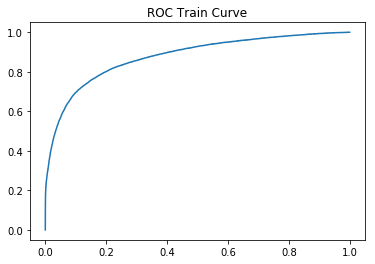

In [401]:
plt.plot(fpr_train,tpr_train)
plt.title('ROC Train Curve')
print("AUC Train: ", auc_train)

In [402]:
(fpr, tpr, thresholds) = roc_curve(test[:,2],test_preds)
auc_test = roc_auc_score(test[:,2],test_preds)

AUC Test:  0.8023591235562036


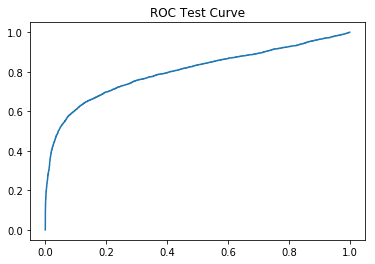

In [403]:
plt.plot(fpr,tpr)
plt.title("ROC Test Curve")
print('AUC Test: ', auc_test)